In [1]:
import tensorflow
from tensorflow import keras
# import tensorflow as tf
# import keras

import pandas as pd

from matplotlib import pyplot as plt
import numpy as np
import os

os.environ["KERAS_BACKEND"] = "plaidml.bridge.keras"

In [2]:
df= pd.read_csv('Churn_Modelling.csv')

df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### Data Exploration

Get unique values for each object columns

In [3]:
for i in df:
    if(df[i].dtypes==object):
        print(df[i].unique())

['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
['France' 'Spain' 'Germany']
['Female' 'Male']


Get statistic information for each non-object columns

In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Plot the distribution for each columns

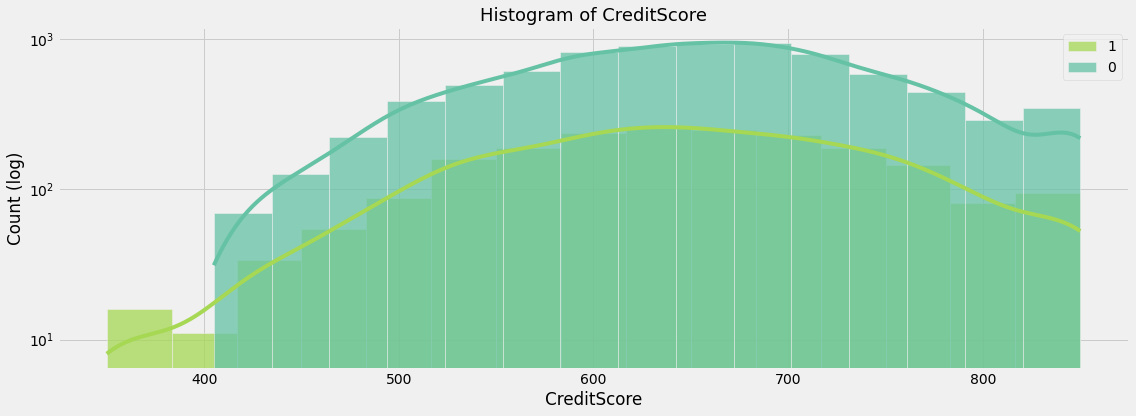

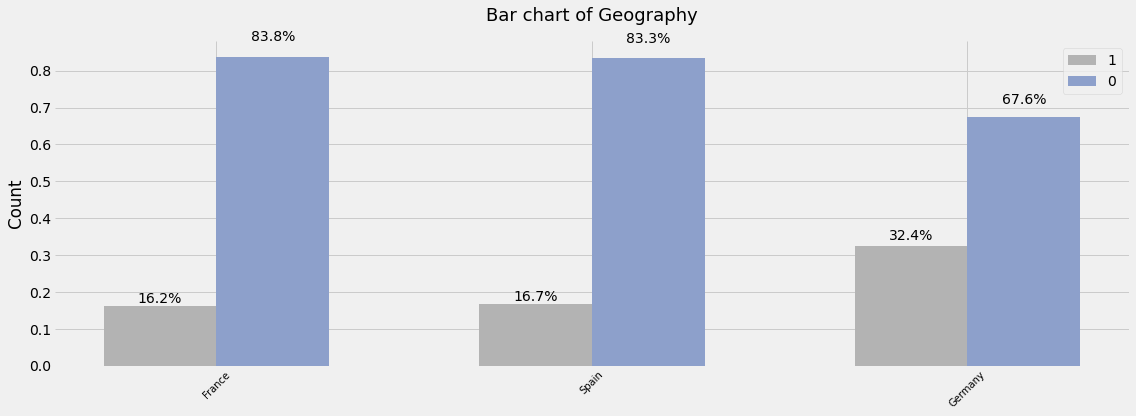

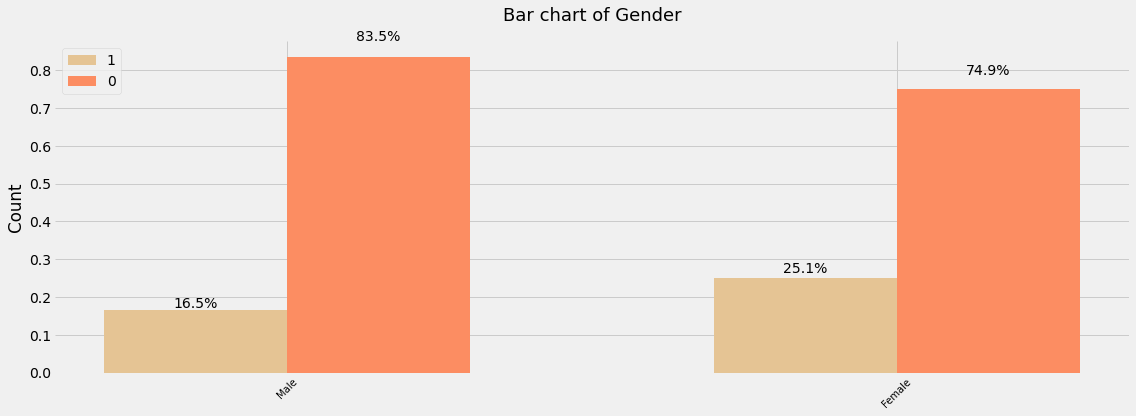

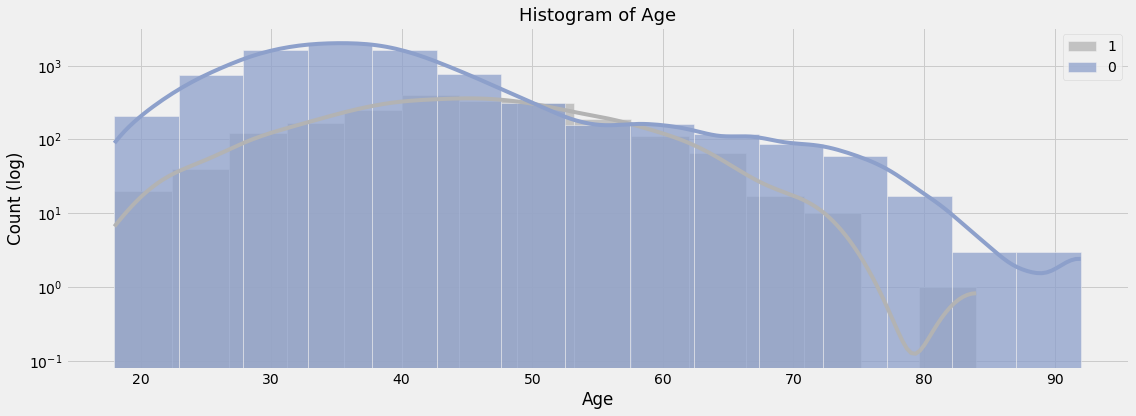

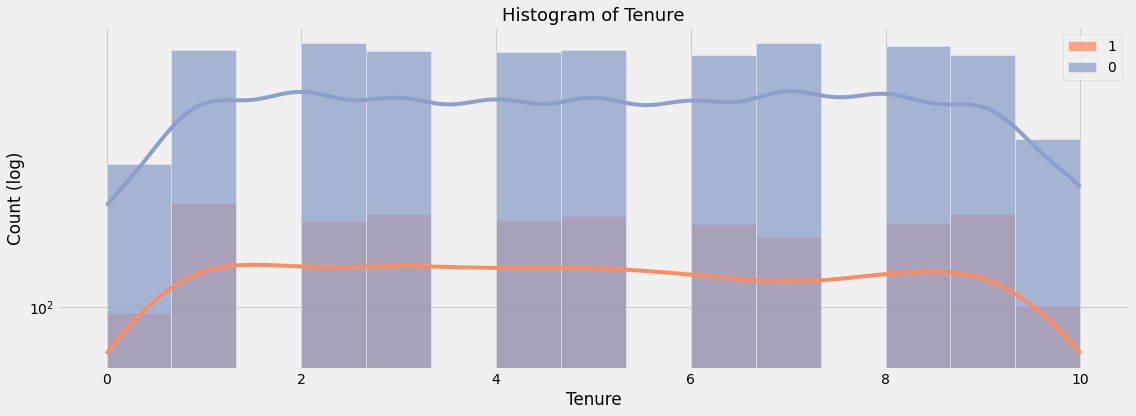

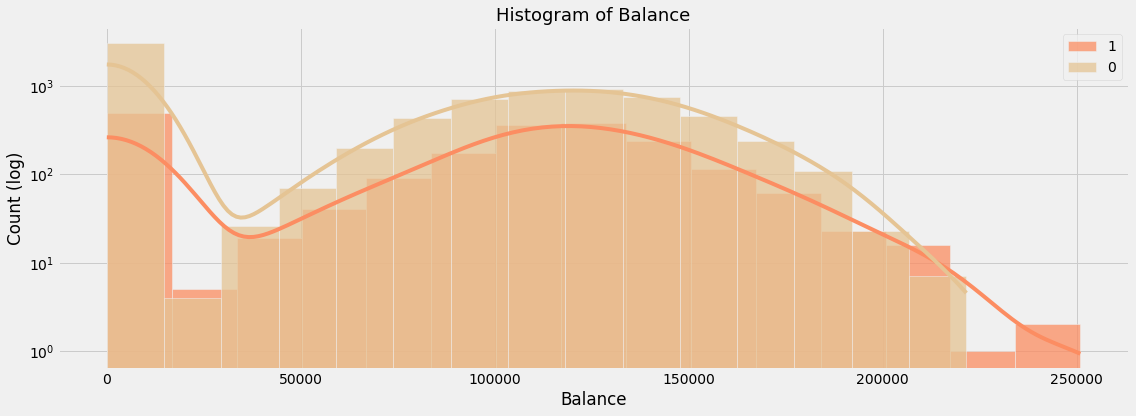

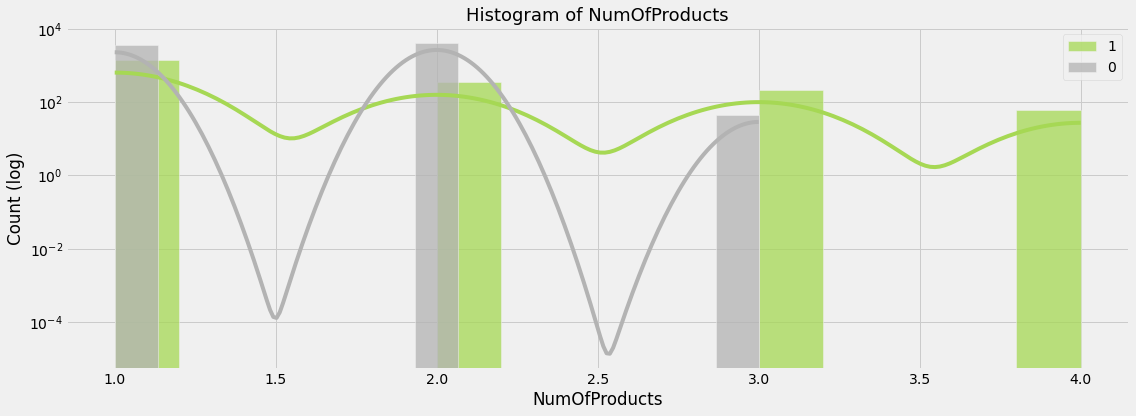

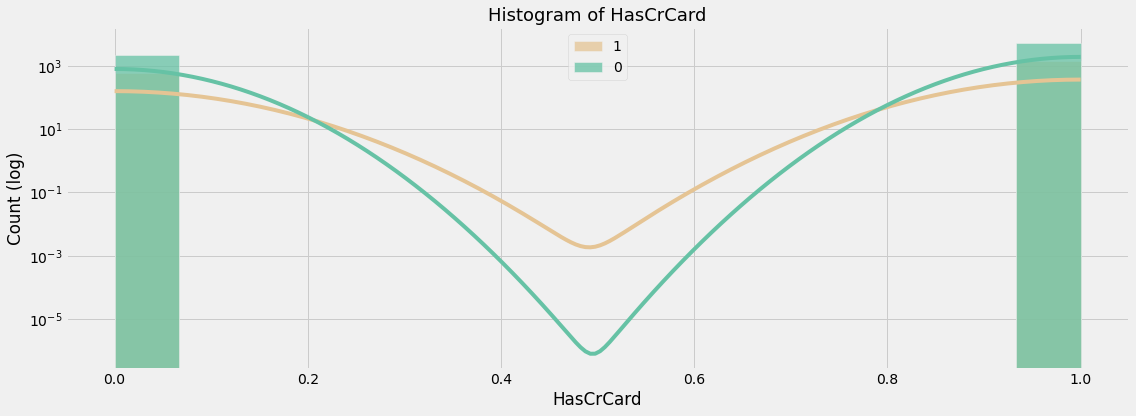

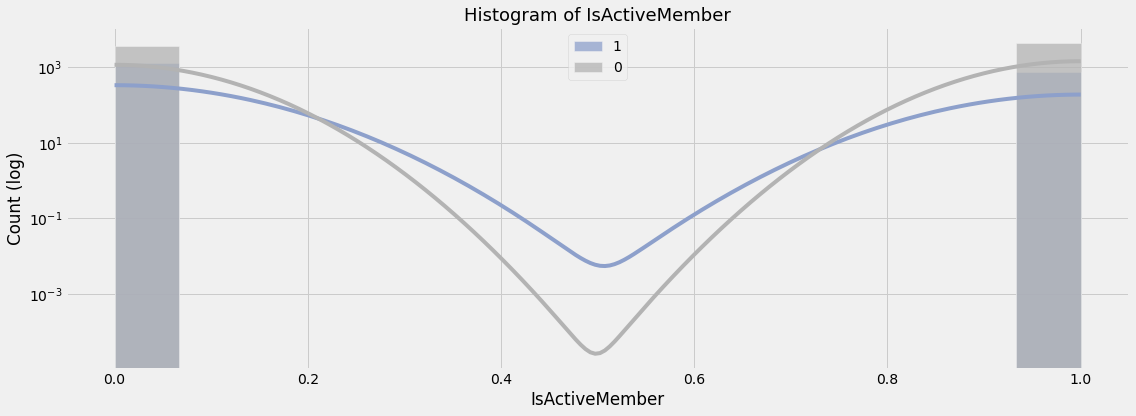

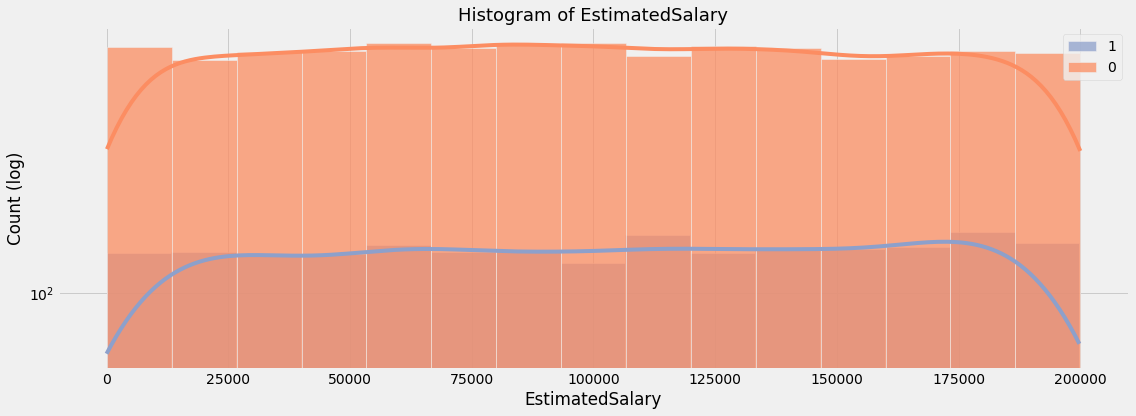

In [5]:
from visualization_snippet import *

plt.style.use('fivethirtyeight')
binary_dataframe_comparison(df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1), 'Exited')

### Preprocessing

Feature Selection

In [6]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace= True)

df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Handling Missing Value

In [7]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Categorical Encoding

In [8]:
[f'{i}: {df[i].dtypes}' for i in df]

['CreditScore: int64',
 'Geography: object',
 'Gender: object',
 'Age: int64',
 'Tenure: int64',
 'Balance: float64',
 'NumOfProducts: int64',
 'HasCrCard: int64',
 'IsActiveMember: int64',
 'EstimatedSalary: float64',
 'Exited: int64']

Encode gender with binary encode and geography with one hot encoder

In [9]:
df= df.replace({'Female':0, 'Male':1})

df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [10]:
df= pd.get_dummies(df, columns=['Geography'])

df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1,0


Move the target columns to the right

In [11]:
exited_cols= df['Exited']

df.drop('Exited', axis=1, inplace=True)
df['Exited']= exited_cols

df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Exited
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0,1
3,699,0,39,1,0.00,2,0,0,93826.63,1,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,1,0,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,1,0,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,0,0,1
9998,772,1,42,3,75075.31,2,1,0,92888.52,0,1,0,1


Normalization

Using MinMaxScaler

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()

Getting the columns that need to be normalized, which is the columns contain datas bigger than 1

In [13]:
cols_to_scale= [i for i in df if df[i].max()!=1]

df[cols_to_scale]= scaler.fit_transform(df[cols_to_scale])

df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Exited
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,0,0,1
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,1,0
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,0,0,1
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,1,0,0,0
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,1,0.283784,0.5,0.000000,0.333333,1,0,0.481341,1,0,0,0
9996,0.332,1,0.229730,1.0,0.228657,0.000000,1,1,0.508490,1,0,0,0
9997,0.718,0,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1,0,0,1
9998,0.844,1,0.324324,0.3,0.299226,0.333333,1,0,0.464429,0,1,0,1


### Building Model

In [14]:
x= df.drop('Exited', axis=1)
y= df['Exited']

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2)

x_train.shape

(8000, 12)

In [16]:
model= keras.Sequential([
    keras.layers.Dense(256, input_shape=(len(x_train.columns),), activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='tanh'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
# %%timeit -n1 -r1 
# tb_callback = tensorflow.keras.callbacks.TensorBoard(log_dir="logs/adam2", histogram_freq=1)
model.fit(x_train, y_train, epochs=30)

Epoch 1/30
250/250 [==============================] - 1s 1ms/step - loss: 0.4486 - accuracy: 0.8073
Epoch 2/30
250/250 [==============================] - 0s 1ms/step - loss: 0.3768 - accuracy: 0.8438
Epoch 3/30
250/250 [==============================] - 0s 1ms/step - loss: 0.3586 - accuracy: 0.8518
Epoch 4/30
250/250 [==============================] - 0s 1ms/step - loss: 0.3458 - accuracy: 0.8597
Epoch 5/30
250/250 [==============================] - 0s 1ms/step - loss: 0.3415 - accuracy: 0.8601
Epoch 6/30
250/250 [==============================] - 0s 1ms/step - loss: 0.3418 - accuracy: 0.8580
Epoch 7/30
250/250 [==============================] - 0s 1ms/step - loss: 0.3382 - accuracy: 0.8611
Epoch 8/30
250/250 [==============================] - 0s 1ms/step - loss: 0.3361 - accuracy: 0.8643
Epoch 9/30
250/250 [==============================] - 0s 1ms/step - loss: 0.3350 - accuracy: 0.8611
Epoch 10/30
250/250 [==============================] - 0s 1ms/step - loss: 0.3305 - accuracy: 0.8634

In [18]:
model.evaluate(x_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.4033 - accuracy: 0.8535


[0.4032800793647766, 0.8535000085830688]

In [19]:
# %load_ext tensorboard
# %tensorboard --logdir=logs/

In [20]:
pred= model.predict(x_test)

pred

array([[0.02871776],
       [0.4297989 ],
       [0.03918424],
       ...,
       [0.2932357 ],
       [0.5609731 ],
       [0.9345993 ]], dtype=float32)

In [21]:
pred2= []

for i in range(len(pred)):
    if(pred[i]<=0.5):
        pred2.append(0)
    else:
        pred2.append(1)

pred2

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,


In [22]:
print(pred2[99])
y_test.reset_index(drop=True, inplace=True)
print(y_test[99])

0
0
